In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LN


# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Weekly activity 9

Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

# Hough Transform

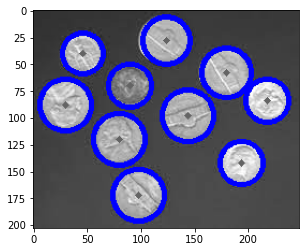

In [2]:

img = cv.imread('coins_1.jfif')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.medianBlur(gray, 7)


row = img.shape[0]
circles = cv.HoughCircles(blur, cv.HOUGH_GRADIENT, 1, row/9, param1 = 150, param2 = 25)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        # draw the center of the circle
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100, 100, 100), 3)
        # draw the whole circle
        radius = i[2]
        cv.circle(img, center, radius, (255, 0, 0), 3)
        
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


# Blobn detection

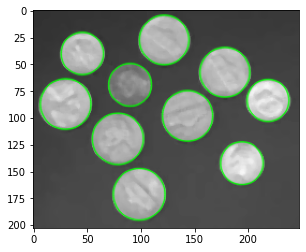

In [3]:
# Standard imports
import cv2
import numpy as np;

im = cv2.imread('coins_1.jfif')

# Read image
im = cv2.medianBlur(im,5)

im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

params = cv2.SimpleBlobDetector_Params()

# filter by color
params.filterByColor = True
params.blobColor = 255

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(im_with_keypoints)
plt.show()


As a result from both method i manage to detect all the coins after some image pre-processing. Hough circle transform got some minor inaccurate on detecting the edge of the coin, but blob detection is more accurate. Blob detection is more accurate because it is based on the intensity and color of the image, so it can detect the edge of the coin more accurately. However, Hough circle transform is more robust to noise and can detect the edge of the coin more accurately.

# K-means Clustering

Apply k-means clustering on 'zebra.jfif' to segment out the zebra

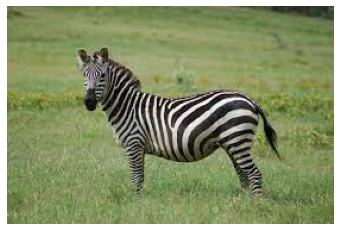

In [4]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(img_rgb)
img_reshape = img_rgb.reshape((-1, 3))

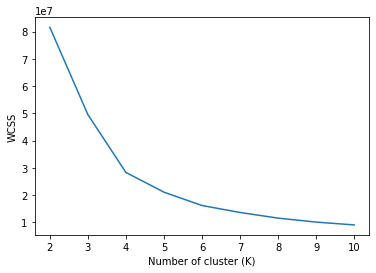

In [5]:
# Convert uint8 to float
img_reshape = np.float32(img_reshape)

# define criteria, number of clusters and apply k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

attempts = 10


K_array = np.array([])
WCSS_array = np.array([]) 

for K in range (2,11):
    ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    K_array = np.append(K_array,K)
    WCSS_array = np.append(WCSS_array,ret)

plt.plot(K_array, WCSS_array)
plt.xlabel('Number of cluster (K)')
plt.ylabel('WCSS')
plt.show()

We can observe that the “elbow” is the number 4 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 4.

In [6]:
img = cv.imread('zebra.jfif')
img_bgr = img.copy()
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#reshape the image, convert to float 
img_bgr_reshape = img_bgr.reshape((-1, 3))
img_bgr_reshape = np.float32(img_bgr_reshape)
img_hsv_reshape = img_hsv.reshape((-1, 3))
img_hsv_reshape = np.float32(img_hsv_reshape)

In [7]:

# define criteria, number of clusters and apply k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K= 4
attempts = 10
ret_bgr, label_bgr, center_bgr = cv.kmeans(img_bgr_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
ret_hsv, label_hsv, center_hsv = cv.kmeans(img_hsv_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

In [8]:
center_bgr = np.uint8(center_bgr)
res_bgr = center_bgr[label_bgr.flatten()]
result_image_bgr = res_bgr.reshape((img_bgr.shape))

center_hsv = np.uint8(center_hsv)
res_hsv = center_hsv[label_hsv.flatten()]
result_image_hsv = res_hsv.reshape((img_hsv.shape))

In [9]:
# white & black mask for bgr
white_color_bgr = (255, 255, 255)
black_color_bgr = (0, 0, 0)


idx_white = np.argmin(LN.norm(white_color_bgr - center_bgr, axis = 1))

# white mask
white_mask_bgr = result_image_bgr == center_bgr[idx_white]
seg_result_white = img_bgr*(white_mask_bgr.astype("uint8"))

# black mask
black = np.argmin(LN.norm(black_color_bgr - center_bgr, axis = 1))
black_color_bgr = result_image_bgr == center_bgr[black]
seg_result_black = img_bgr*(black_color_bgr.astype("uint8"))

# segmented 
seg_result_bgr = cv.bitwise_or(seg_result_white, seg_result_black, mask = None)

In [10]:
#white & black mask for hsv
white_color_hsv = (0, 0, 255)
black_color_hsv = (0, 0, 0)

# white mask
idx_white_hsv = np.argmin(LN.norm(white_color_hsv - center_hsv, axis = 1))
white_mask2 = result_image_hsv == center_hsv[idx_white_hsv]
seg_result_white_hsv = img_hsv*(white_mask2.astype("uint8"))

#black mask
black_hsv = np.argmin(LN.norm(black_color_hsv - center_hsv, axis = 1))
black_mask2 = result_image_hsv == center_hsv[black_hsv]
seg_result_black_hsv = img_hsv*(black_mask2.astype("uint8"))

# segmented
seg_result_hsv = cv.bitwise_or(seg_result_white_hsv, seg_result_black_hsv, mask = None)

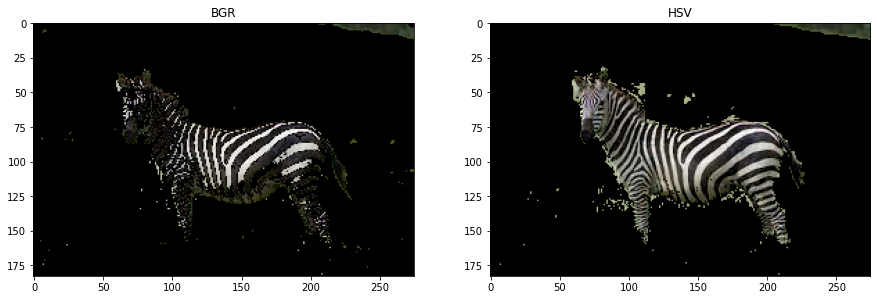

In [11]:
plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(seg_result_bgr, cv.COLOR_BGR2RGB))
plt.title('BGR')
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(seg_result_hsv, cv.COLOR_HSV2RGB))
plt.title('HSV')
plt.show()